# EDA Affair Dataset
---

### by Yanuar T. A. Nugraha

### Table of Contents

### Introduction & Features

A project for learning logistic regression to predict if someone has an affair or not using training dataset from [Affair](http://www.statsmodels.org/dev/datasets/generated/fair.html). The provided data by Statsmodels is rather clean and no preprocessing is needed. This project shall focus only on determining underlying problem on estimating/predicting a dependable variable which values will be between *True* (1) or *False* (0).

In [362]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

%matplotlib inline

(As quoted from the dataset page), here is a little snippet on the attributes:

In [363]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [92]:
df = sm.datasets.fair.load_pandas().data
df['affair_yesno'] = df['affairs'].apply(lambda x: 1 if x > 0 else 0)
df.describe(include='all')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_yesno
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


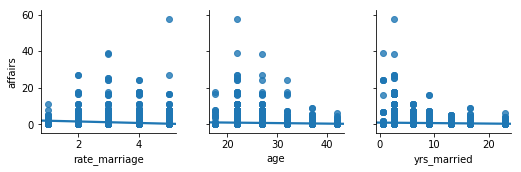

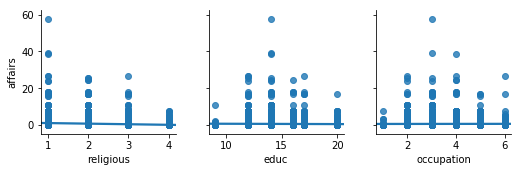

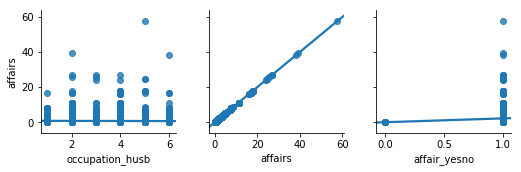

In [93]:
sns.pairplot(df, 
             y_vars=['affairs'],
             x_vars=df.columns[:len(df.columns)//3],
             kind='reg')
sns.pairplot(df,
             y_vars=['affairs'], 
             x_vars=df.columns[len(df.columns)//3+1:7],
             kind='reg')
sns.pairplot(df,
             y_vars=['affairs'], 
             x_vars=df.columns[len(df.columns)//3+4:],
             kind='reg')

In [94]:
df.groupby('affair_yesno').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair_yesno,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [95]:
dummy_occ = pd.get_dummies(df['occupation'])
dummy_hocc = pd.get_dummies(df['occupation_husb'])
df_dummy = pd.concat([dummy_occ, dummy_hocc], axis=1)
df_dummy.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6', 
                    'hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6',]
df_dummy.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [96]:
# Y
Y = df['affair_yesno']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair_yesno, dtype: int64

In [250]:
# X
X = df.drop(['occupation', 'occupation_husb'], axis=1)
X = pd.concat([X, df_dummy], axis=1)

# drop Y
X = X.drop(['affairs', 'affair_yesno'], axis=1)

### Basic Fit using Means of 0-1 D.V

In [251]:
mean_y = Y.mean()
mean_y

0.3224945020420987

This means that if you guess with this model on 'no affair', we would have had 1.0 - 0.322 = 0.68 accuracy (or 68%). Now lets see if we can go higher with using logistic regression.

In [252]:
loReg = LogisticRegression()
loReg.fit(X, np.ravel(Y))
loReg.score(X, np.ravel(Y))

0.7260446120012567

Now it seems like we have 0.72 accuracy (or 72%) which is a tad better than the basic model fit using *mean*.

In [253]:
pd.DataFrame(list(zip(X.columns, np.transpose(loReg.coef_))))

,0,1
0,rate_marriage,[-0.698690855399]
1,age,[-0.056575276215]
2,yrs_married,[0.104141001251]
3,children,[0.0182876120648]
4,religious,[-0.368931113331]
5,educ,[0.00798828013956]
6,occ1,[-0.155168389009]
7,occ2,[0.220540109027]
8,occ3,[0.530233017257]
9,occ4,[0.270206389634]


### Testing and Training 

In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4774, 18) (1592, 18) (4774,) (1592,)


In [255]:
loRegTra = LogisticRegression()
loRegTra.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [256]:
pred_test = loRegTra.predict(X_test)
loRegTra.score(X_test, Y_test)

0.71984924623115576

It seems like now have 72.7% accuracy which is pretty close to the normal logistic regression without training. How to improvise?

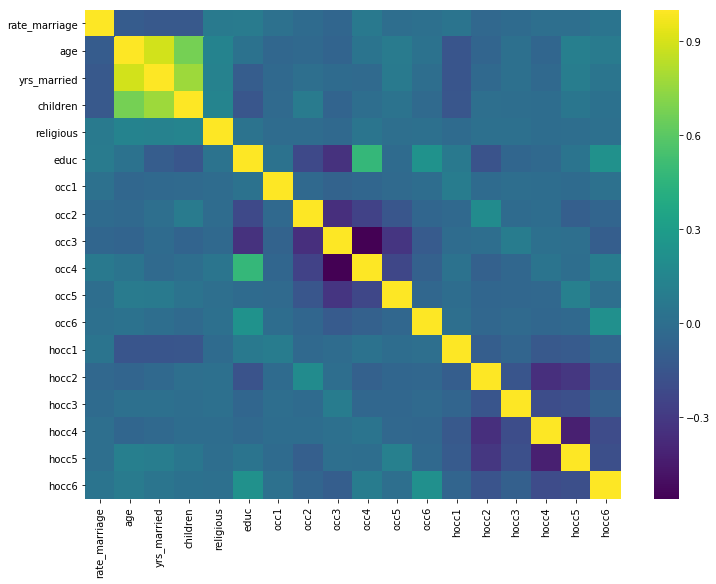

In [257]:
# check feature-to-feature correlation
X_pearson = X.corr(method='pearson')

plt.subplots(figsize=(12,9))
sns.heatmap(X_pearson, fmt="g", cmap='viridis')

In [357]:
# sort the attribute from the most predictive
corr_with_target = X_pearson.iloc[-1][:-1]
predictivity_sorted = corr_with_target.sort_values(ascending=False)
predictivity_sorted

educ             0.223167
occ6             0.218824
occ4             0.085766
age              0.083212
yrs_married      0.042921
rate_marriage    0.039561
children         0.024260
occ1             0.018385
religious        0.006558
occ5             0.006016
hocc1           -0.058213
occ2            -0.059107
hocc3           -0.087024
occ3            -0.101673
hocc2           -0.153248
hocc5           -0.187674
hocc4           -0.206198
Name: hocc6, dtype: float64

In [361]:
# all except target
attrs = X_pearson.iloc[:-1,:-1]

# only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), 
                                                 important_corrs[key]) \
                                                 for key in important_corrs])), 
                                      columns=['attribute pair', 'correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

,attribute pair,correlation
0,"(age, yrs_married)",0.894082
3,"(children, yrs_married)",0.772806
1,"(age, children)",0.673902
2,"(occ3, occ4)",-0.560645
